In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv(r"C:\Users\sneha\Downloads\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df=df.drop('CustomerID',axis=1)
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

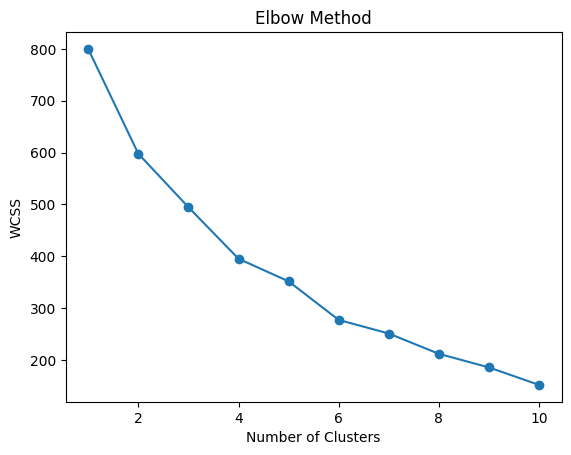

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df['Cluster'] = clusters

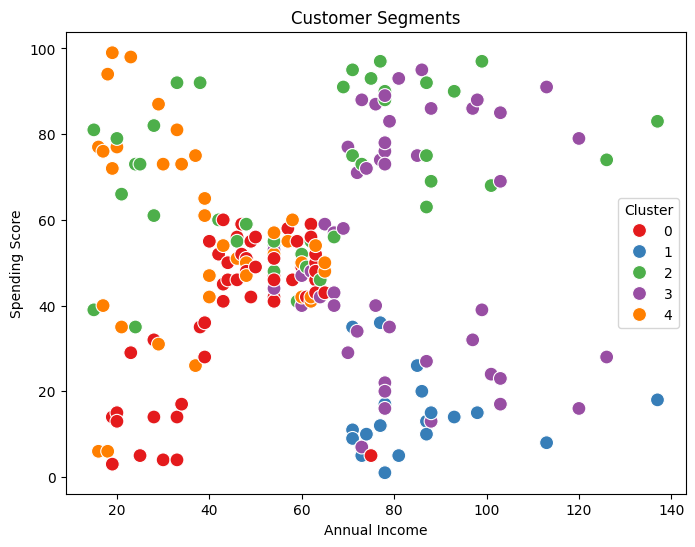

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set1',
    s=100
)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [8]:
df['Cluster'] = clusters
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       0   19                  15                      39        2
1       0   21                  15                      81        2
2       1   20                  16                       6        4
3       1   23                  16                      77        4
4       1   31                  17                      40        4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

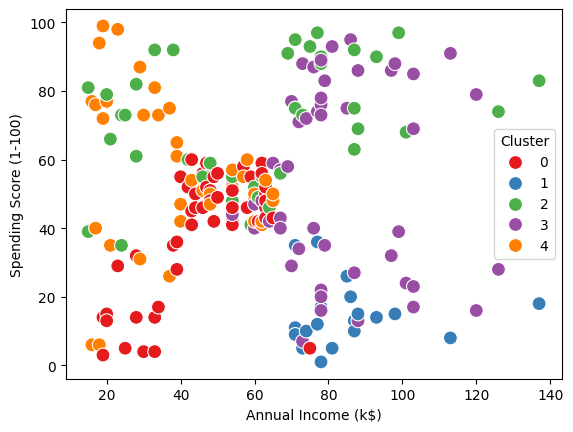

In [9]:
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set1',
    s=100
)

Cluster 0 – High income, high spenders (top-right)
Cluster 1 – Low income, low spenders (bottom-left)
Cluster 2 – Average income, high spenders
Cluster 3 – High income, low spenders
Cluster 4 – Young age, high spenders

In [11]:
df.groupby('Cluster').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.490196,56.470588,46.098039,39.313725
1,0.000000,39.500000,85.150000,14.050000
2,0.000000,28.690476,60.904762,70.238095
3,1.000000,37.897959,82.122449,54.448980
4,1.000000,27.315789,38.842105,56.210526
